In [7]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature
import pandas as pd

from scipy import stats
import matplotlib.cm as cm

In [8]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/set_13/set13_5000.zarr/')

In [9]:
sim = sim.compute()

In [10]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 3700)
Dimensions without coordinates: traj, obs
Data variables: (12/16)
    Kz                (traj, obs) float32 1.482e-05 1.461e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7251 0.7317 0.74 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.045e-08 5.045e-08 ... nan nan
    lat               (traj, obs) float64 -32.17 -32.14 -32.11 ... nan nan nan
    ...                ...
    surface           (traj, obs) float64 0.0 0.0 0.0 ... -2.147e+09 -2.147e+09
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... NaT
    trajectory        (traj, obs) float64 0.0 0.0 0.0 ... -9.223e+18 -9.223e+18
    v_s               (traj, obs) float32 0.0 4.747e-10 4.747e-10 ... nan nan
    w                 (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5e+03 5.012e+03 5.015e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

[]

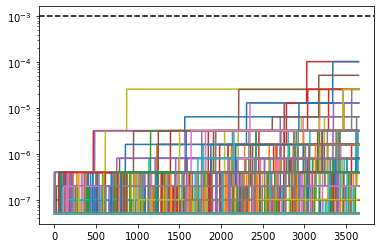

In [11]:
for i in range(0, 1000, 1):
    plt.plot(sim['diameter'][i,:])

plt.axhline(1e-3, color='black', linestyle='--')
plt.semilogy()
# plt.xlim(-10,10)

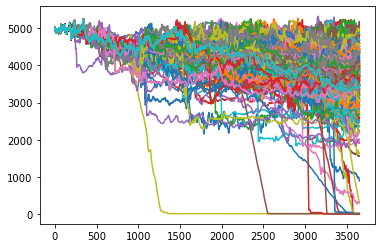

In [12]:
for i in range(0, 1000, 1):
    plt.plot(sim['z'][i,:])

# plt.axhline(1e-3, color='black', linestyle='--')
# plt.semilogy()
# plt.xlim(-10,10)

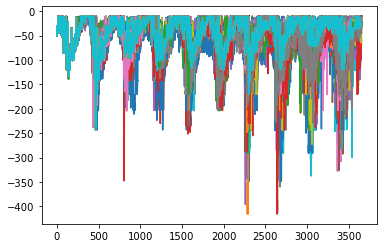

In [13]:
for i in range(0, 1000, 1):
    plt.plot(-sim['mld'][i,:])

# plt.axhline(1e-3, color='black', linestyle='--')

(3650.0, 3700.0)

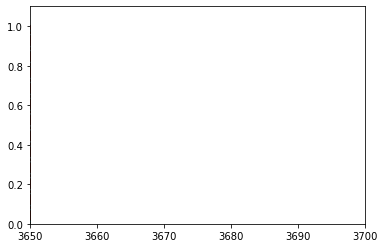

In [8]:
for i in range(0, 10000, 1):
    plt.plot(sim['surface'][i,:], '-.')

plt.ylim(0, 1.1)
plt.xlim(3650, 3700)
# plt.axhline(1e-3, color='black', linestyle='--')

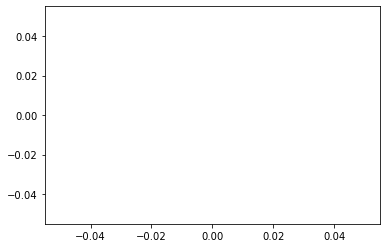

In [29]:
plt.scatter(sim['lon'][:,-1], sim['lat'][:,-1])

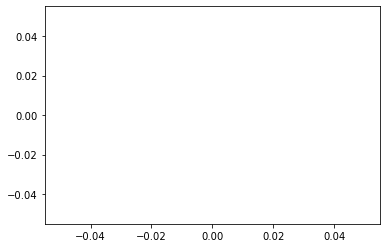

In [34]:
plt.scatter(sim['lon'][:,-3], -sim['z'][:,-3])

In [10]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)

NameError: name 'suf' is not defined

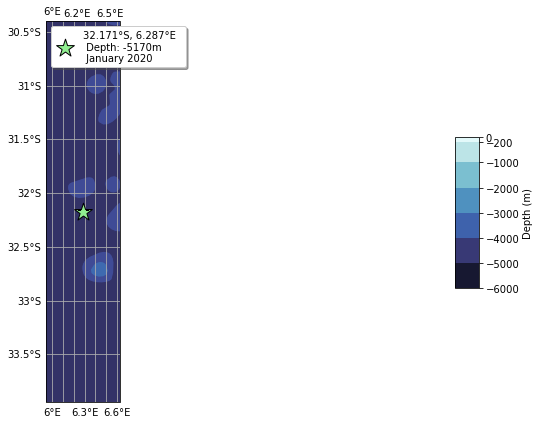

In [11]:
max_depth = -5500
min_depth = 0 

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
frame = -1
im = ax.scatter(suf['lon'][:,frame], suf['lat'][:,frame], zorder=4, 
           c=suf['diameter'][:,frame], s=5, cmap='spring')

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle diameter (m)')
ax.set_title('10 years before sampling', fontsize=15, weight='bold')
# plt.savefig('../figs/revers.png')

0 500
1 1000
2 1500
3 2000
4 2500
5 3000
6 3500
7 4000
8 4500
9 5000


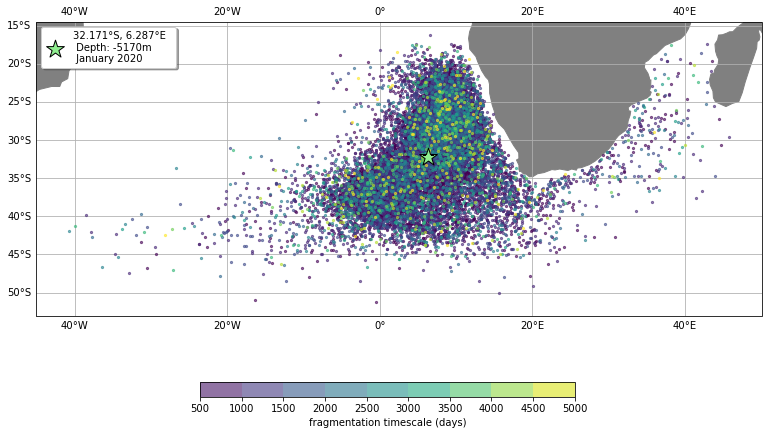

In [30]:
max_depth = -5500
min_depth = 0 

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)


frag_times = np.linspace(500, 5000, 10, dtype=int)

colormap='viridis'
x_colors = np.linspace(0, 1, len(frag_times))
colors = cm.get_cmap(colormap)(x_colors)

frame = -1
for i, ft in enumerate(frag_times):
    print(i, ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_13/set13_{ft}.zarr/')
#     sim = sim.compute()
    suf = sim.where(sim.surface==1, drop=True)

    im = ax.scatter(suf['lon'][:,frame], suf['lat'][:,frame], color=colors[i], zorder=4, s=5, alpha=0.6)


bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', 
             ticks=frag_times, boundaries=frag_times, label='fragmentation timescale (days)')

# ax.set_title('10 years before sampling', fontsize=15, weight='bold')
# plt.savefig('../figs/revers.png')

In [94]:
len(frag_times)

10

In [41]:
colors = plt.rcParams["axes.prop_cycle"]()

In [68]:
xmin = suf['lon'][:,-1].dropna(dim='traj').min().values
xmax = suf['lon'][:,-1].dropna(dim='traj').max().values
ymin = suf['lat'][:,-1].dropna(dim='traj').min().values
ymax = suf['lat'][:,-1].dropna(dim='traj').max().values

In [69]:
x_range = np.linspace(xmin, xmax, 500)
y_range = np.linspace(ymin, ymax, 500)

In [70]:
kernel_lon = stats.gaussian_kde(suf['lon'][:,-1].dropna(dim='traj'))
kernel_lat = stats.gaussian_kde(suf['lat'][:,-1].dropna(dim='traj'))

In [71]:
kde_lon = kernel_lon(x_range)
kde_lat = kernel_lat(y_range)

In [77]:
n_surf_part = suf['lon'][:,-1].dropna(dim='traj').shape[0]

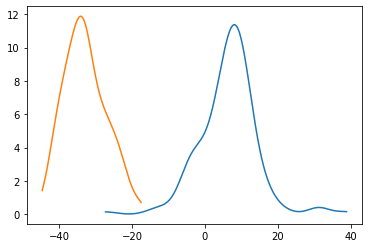

In [78]:
plt.plot(x_range, kde_lon*n_surf_part)
plt.plot(y_range, kde_lat*n_surf_part)

0 500
1 1000
2 1500
3 2000
4 2500
5 3000
6 3500
7 4000
8 4500
9 5000


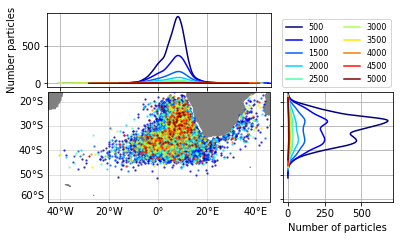

In [64]:
frame = 0
n_day = 360

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Number particles')
# ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Number of particles')


ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')


size_point = 0.7
frame = -1

frag_times = np.linspace(500, 5000, 10, dtype=int)

colormap='jet'
x_colors = np.linspace(0, 1, len(frag_times))
colors = cm.get_cmap(colormap)(x_colors)

for i, ft in enumerate(frag_times):
    print(i, ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_13/set13_{ft}.zarr/')
    suf = sim.where(sim.surface==1, drop=True)
    
    xmin = suf['lon'][:,-1].dropna(dim='traj').min().values
    xmax = suf['lon'][:,-1].dropna(dim='traj').max().values
    ymin = suf['lat'][:,-1].dropna(dim='traj').min().values
    ymax = suf['lat'][:,-1].dropna(dim='traj').max().values
    x_range = np.linspace(xmin, xmax, 500)
    y_range = np.linspace(ymin, ymax, 500)
    
    kernel_lon = stats.gaussian_kde(suf['lon'][:,-1].dropna(dim='traj'))
    kernel_lat = stats.gaussian_kde(suf['lat'][:,-1].dropna(dim='traj'))
    
    kde_lon = kernel_lon(x_range)
    kde_lat = kernel_lat(y_range)
    
    n_surf_part = suf['lon'][:,-1].dropna(dim='traj').shape[0]
    
    ax.scatter(suf['lon'][:,frame], suf['lat'][:,frame], color=colors[i], zorder=4, s=2, alpha=0.6)

    ax_lon.plot(x_range, kde_lon*n_surf_part, color=colors[i], label=ft)
    ax_lat.plot(kde_lat*n_surf_part, y_range, color=colors[i])
    
ax_lon.legend(loc=(1.05, 0.), ncol=2, fontsize=8)

plt.savefig('../figs/frag_t_distribution_nondensity.png', dpi=300)

0 500
1 1000
2 1500
3 2000
4 2500
5 3000
6 3500
7 4000
8 4500
9 5000


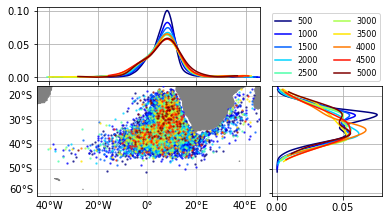

In [65]:
frame = 0
n_day = 360

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
# ax_lon.set_ylabel('Number particles')
# ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
# ax_lat.set_xlabel('Number of particles')


ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')


size_point = 0.7
frame = -1

frag_times = np.linspace(500, 5000, 10, dtype=int)

colormap='jet'
x_colors = np.linspace(0, 1, len(frag_times))
colors = cm.get_cmap(colormap)(x_colors)

for i, ft in enumerate(frag_times):
    print(i, ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_13/set13_{ft}.zarr/')
    suf = sim.where(sim.surface==1, drop=True)
    
    xmin = suf['lon'][:,-1].dropna(dim='traj').min().values
    xmax = suf['lon'][:,-1].dropna(dim='traj').max().values
    ymin = suf['lat'][:,-1].dropna(dim='traj').min().values
    ymax = suf['lat'][:,-1].dropna(dim='traj').max().values
    x_range = np.linspace(xmin, xmax, 500)
    y_range = np.linspace(ymin, ymax, 500)
    
    kernel_lon = stats.gaussian_kde(suf['lon'][:,-1].dropna(dim='traj'))
    kernel_lat = stats.gaussian_kde(suf['lat'][:,-1].dropna(dim='traj'))
    
    kde_lon = kernel_lon(x_range)
    kde_lat = kernel_lat(y_range)
    
    n_surf_part = suf['lon'][:,-1].dropna(dim='traj').shape[0]
    
    ax.scatter(suf['lon'][:,frame], suf['lat'][:,frame], color=colors[i], zorder=4, s=2, alpha=0.6)

    ax_lon.plot(x_range, kde_lon, color=colors[i], label=ft)
    ax_lat.plot(kde_lat, y_range, color=colors[i])
    
ax_lon.legend(loc=(1.05, 0.), ncol=2, fontsize=8)

plt.savefig('../figs/frag_t_distribution_density.png', dpi=300)

## Timescale to reach the surface

In [85]:
particles_surface = np.zeros(10)
min_ts = np.zeros(10)
max_ts = np.zeros(10)
time_scales = {}
diameters = {}

for i, ft in enumerate(range(500, 5500, 500)):
    print(i, ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_13/set13_{ft}.zarr/')
#     sim = sim.compute()
    
    suf = sim.where(sim.surface==1, drop=True)
    a = 3650 - suf['surface'][:, :3650].sum(axis=1)
    particles_surface[i] = a.shape[0]
    time_scales[ft] = a
    diameters[ft] = suf['diameter'][:, -1]

0 500
1 1000
2 1500
3 2000
4 2500
5 3000
6 3500
7 4000
8 4500
9 5000


In [19]:
np.linspace(500, 5000, 10)/365

array([ 1.36986301,  2.73972603,  4.10958904,  5.47945205,  6.84931507,
        8.21917808,  9.5890411 , 10.95890411, 12.32876712, 13.69863014])

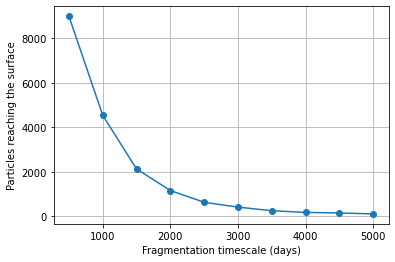

In [70]:
plt.plot(range(500, 5500, 500), particles_surface, 'o-')
plt.xlabel('Fragmentation timescale (days)')
plt.ylabel('Particles reaching the surface')
plt.grid()

Text(0, 0.5, 'Number of particles')

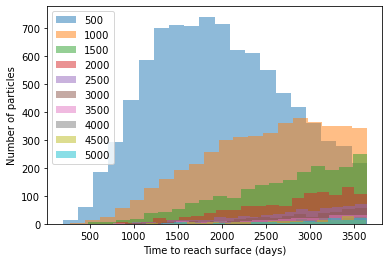

In [83]:
for i, ft in enumerate(range(500, 5500, 500)):
    plt.hist(time_scales[ft], label=ft, alpha=0.5, bins=20)
    
plt.legend()
plt.xlabel('Time to reach surface (days)')
plt.ylabel('Number of particles')

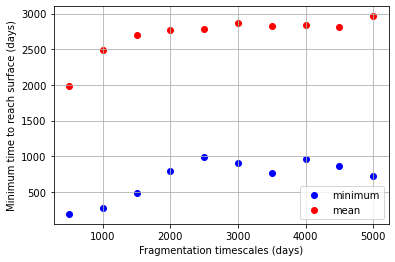

In [132]:
plt.scatter(500, time_scales[500].min(), color='b', label='minimum')
plt.scatter(500, time_scales[500].mean(), color='r', label='mean')

for i, ft in enumerate(range(1000, 5500, 500)):
    plt.scatter(ft, time_scales[ft].min(), color='b')
    plt.scatter(ft, time_scales[ft].mean(), color='r')
    
plt.grid()
plt.ylabel('Minimum time to reach surface (days)')
plt.xlabel('Fragmentation timescales (days)')
plt.legend()

In [ ]:
for i, ft in enumerate(range(500, 5500, 500)):
    plt.hist(time_scales[ft], label=ft, alpha=0.5, bins=20)
    
plt.legend()
plt.xlabel('Time to reach surface (days)')
plt.ylabel('Number of particles')

In [95]:
np.logspace(-8, -3, 20)

array([1.00000000e-08, 1.83298071e-08, 3.35981829e-08, 6.15848211e-08,
       1.12883789e-07, 2.06913808e-07, 3.79269019e-07, 6.95192796e-07,
       1.27427499e-06, 2.33572147e-06, 4.28133240e-06, 7.84759970e-06,
       1.43844989e-05, 2.63665090e-05, 4.83293024e-05, 8.85866790e-05,
       1.62377674e-04, 2.97635144e-04, 5.45559478e-04, 1.00000000e-03])

In [117]:
1000e-9*1000

0.001

Text(0, 0.5, 'Number of particles')

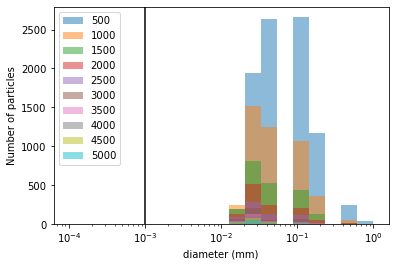

In [118]:
for i, ft in enumerate(range(500, 5500, 500)):
    plt.hist(diameters[ft]*1000, label=ft, alpha=0.5, bins=np.logspace(-4, 0, 20))

plt.axvline(1e-3, color='k')
plt.semilogx()
plt.legend()
plt.xlabel('diameter (mm)')
plt.ylabel('Number of particles')

Text(0, 0.5, 'Density (%?)')

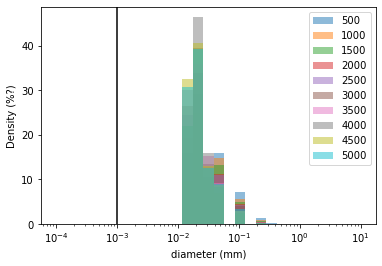

In [129]:
for i, ft in enumerate(range(500, 5500, 500)):
    plt.hist(diameters[ft]*1000, label=ft, alpha=0.5, bins=np.logspace(-4, 1, 30), density=True)

plt.axvline(1e-3, color='k')
plt.semilogx()
plt.legend()
plt.xlabel('diameter (mm)')
plt.ylabel('Density (%?)')

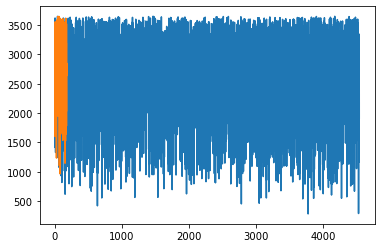

In [21]:
plt.plot(time_scales[1000])
plt.plot(time_scales[4000])

In [106]:
suf = sim.where(sim.surface==1, drop=True)

In [94]:
suf

<xarray.Dataset>
Dimensions:           (traj: 109, obs: 2922)
Dimensions without coordinates: traj, obs
Data variables: (12/16)
    Kz                (traj, obs) float32 nan nan nan ... 0.003131 0.006538
    abs_salinity      (traj, obs) float32 nan nan nan nan ... 35.62 35.61 35.59
    cons_temperature  (traj, obs) float32 nan nan nan nan ... 20.14 19.91 19.79
    density           (traj, obs) float32 nan nan nan ... 1.025e+03 1.025e+03
    diameter          (traj, obs) float64 nan nan nan ... 2.583e-05 2.583e-05
    lat               (traj, obs) float64 nan nan nan ... -32.38 -32.38 -32.38
    ...                ...
    surface           (traj, obs) float64 nan nan nan nan ... 1.0 1.0 1.0 1.0
    time              (traj, obs) datetime64[ns] NaT NaT ... 2010-01-01T12:00:00
    trajectory        (traj, obs) float64 nan nan nan ... 9.933e+03 9.933e+03
    v_s               (traj, obs) float32 nan nan nan nan ... 0.0 0.0 0.0 0.0
    w                 (traj, obs) float32 nan nan nan nan ... 0.0 0.0 0.0 0.0
    z                 (traj, obs) float64 nan nan nan nan ... 10.14 10.14 10.14
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

(0.0, 1.1)

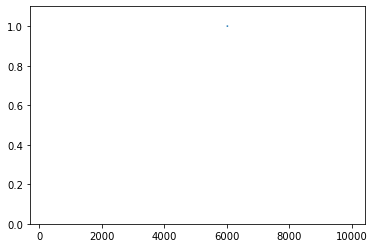

In [79]:
plt.plot(suf['surface'][:,3650])
plt.ylim(0, 1.1)

In [95]:
a = 3650 - suf['surface'][:, :3650].sum(axis=1)

In [110]:
a.shape[0]

109

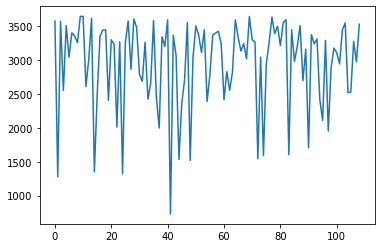

In [96]:
plt.plot(a)

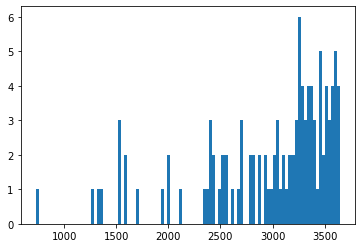

In [99]:
plt.hist(a, bins=100);

In [45]:
sim['surface']

<xarray.DataArray 'surface' (traj: 10000, obs: 3600)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.14748365e+09, -2.14748365e+09, -2.14748365e+09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.14748365e+09, -2.14748365e+09, -2.14748365e+09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.14748365e+09, -2.14748365e+09, -2.14748365e+09],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.14748365e+09, -2.14748365e+09, -2.14748365e+09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.14748365e+09, -2.14748365e+09, -2.14748365e+09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.14748365e+09, -2.14748365e+09, -2.14748365e+09]])
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  surface
    units:          unknown

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

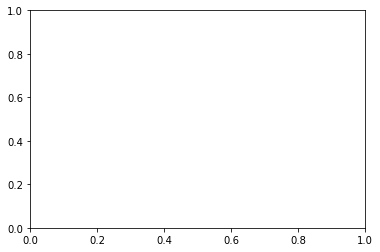

In [71]:
plt.plot(sim.where(sim['surface']== 1))

In [ ]:
s